# Validation des schémas numériques aux différences finies 1d

On posera $a=0$, $b=1$ et $\epsilon =0.01$ 
 

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
a = 0
b = 1
eps = 0.01

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import code_python as homogenization

Les fonctions à tester :
- $u(x)=x(1-x)$ pour tester la convergence exacte (erreur = zéro machine) pour les polynomes d'ordre 2 et des pas de discrétisation grands
- $u(x) = sin(\pi x)$ pour tester l'ordre du schéma
    

Validation pour le problème :
\begin{cases}
    -a^*\frac{d^2u}{dx^2} = f(x), & \text{pour } x \in [a,b] \\
    u(a) = u(b) = 0.
\end{cases}

In [4]:
a_star = 100

def u_ex(x):
    #return x*(1-x)
    return np.sin(np.pi*x)
    #return np.zeros(np.size(x))

def f(x):
    #return 2*a_star*np.ones(x.size)
    return np.pi**2*a_star*np.sin(np.pi*x)
    #return np.zeros(np.size(x))


C:\Users\ethem\Desktop\stage-m1\homogenization-learn\code_python\DF_1d.py:19: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  return spsolve(A,b)


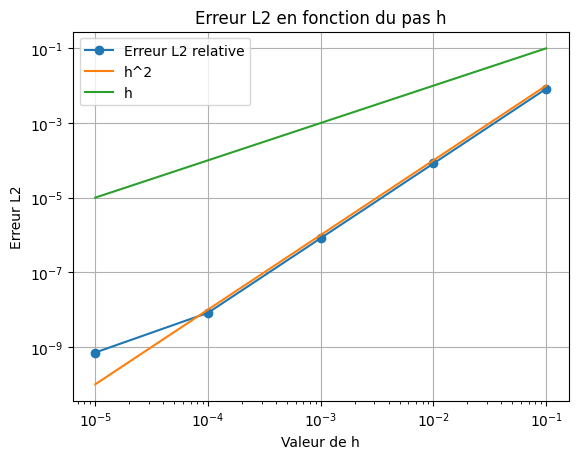

In [5]:
k_list = np.linspace(1,5,5,dtype=int)
n_list = 10**k_list

error_list = []
h_value = []
for i in n_list:
    X = np.linspace(a,b,i+1)
    h = abs(X[1]-X[0])
    F = f(X)
    U_ex = u_ex(X)
    U_est = homogenization.DF_solve_laplacien(a_star,i,h,F)
    err = np.linalg.norm(U_ex - U_est)/np.linalg.norm(U_ex)
    error_list.append(err)
    h_value.append(h)
    #print("Erreur L2 :", err)
    #plt.plot(X,U_est,label='Solution estimée par DF')
    #plt.plot(X,U_ex,label='Solution exacte')
    #plt.show()
    
    
fig = plt.figure()
ax = plt.subplot()
ax.loglog(h_value, error_list, marker='o', label='Erreur L2 relative')
ax.loglog(h_value, [x**2 for x in h_value], label='h^2')
ax.loglog(h_value, h_value, label='h')
ax.legend()

plt.xlabel('Valeur de h')
plt.ylabel('Erreur L2')
plt.title('Erreur L2 en fonction du pas h')
plt.grid(True)
plt.show()

Validation du schéma numérique pour la résolution du problème suivant par différences finies :
\begin{cases}
    -\frac{d}{dx}\left( a_\epsilon(x) \frac{du}{dx} \right) = f(x), & \text{pour } x \in [a,b] \\
    u(a) = u(b) = 0.
\end{cases}

In [6]:
def u_ex(x):
    #return x*(1-x)
    return np.sin(np.pi*x)
    #return np.zeros(np.size(x))

def f(x,eps):
    #return +4+2/eps*np.pi*np.sin(2*np.pi*x/eps) + 2*np.cos(2*np.pi*x/eps) - 4*x*np.pi/eps*np.sin(2*np.pi*x/eps)
    return 2 *(np.pi**2)*np.sin(np.pi*x) + (np.pi**2)*np.sin(np.pi*x)*np.cos(2*np.pi*x/eps) + 2*(np.pi**2)/eps*np.cos(np.pi*x)*np.sin(2*np.pi*x/eps)
    #return np.zeros(np.size(x))

def a_eps(x,eps):
    return 2 + np.cos(2*np.pi*x/eps)


C:\Users\ethem\Desktop\stage-m1\homogenization-learn\code_python\DF_1d.py:62: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  return spsolve(A,b)


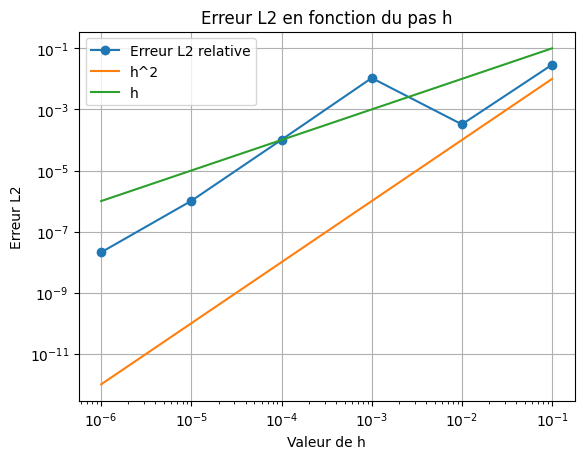

In [7]:
k_list = np.linspace(1,6,6,dtype=int)
n_list = 10**k_list

error_list = []
h_value = []
for i in n_list:
    X = np.linspace(a,b,i+1)
    A_eps = a_eps(X,eps)
    h = abs(X[1]-X[0])
    F = f(X,eps)
    U_ex = u_ex(X)
    U_est = homogenization.DF_solve(i,h,F,A_eps)
    err = np.linalg.norm(U_ex - U_est)/np.linalg.norm(U_ex)
    error_list.append(err)
    h_value.append(h)
    #print("Erreur L2 :", err)
    #plt.plot(X,U_est,label='Solution estimée par DF')
    #plt.plot(X,U_ex,label='Solution exacte')
    #plt.show()
    
fig = plt.figure()
ax = plt.subplot()
ax.loglog(h_value, error_list, marker='o', label='Erreur L2 relative')
ax.loglog(h_value, [x**2 for x in h_value], label='h^2')
ax.loglog(h_value, h_value, label='h')
ax.legend()

plt.xlabel('Valeur de h')
plt.ylabel('Erreur L2')
plt.title('Erreur L2 en fonction du pas h')
plt.grid(True)
plt.show()